In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

# Data Cleaning

In [143]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [144]:
df1.shape

(13320, 9)

In [145]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [146]:
# Drop columns which are assumed to be irrelevant for predicting house prices
df2 = df1.drop(['area_type', 'availability', 'society', 'balcony'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [147]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [148]:
# Remove null values as there are at most 90 rows removed
# 90 is small compared to 13320
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [149]:
df3.shape

(13246, 5)

In [150]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [151]:
# Create new column 'bhk' which converts all x bedroom values to x bhk
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

/var/folders/fw/vf825wcs391_dr3gkt30zx3w0000gn/T/ipykernel_8017/586934319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [152]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [153]:
# 43 bedrooms with a total_sqft of 2400 is impossible...
df3[df3['bhk'] > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [154]:
# Notice there are values like '1133 - 1384'
# We want the values to be just a singular float so we can work with them
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [155]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [156]:
# Row 410 has 'total_sqft' value of 34.46Sq. Meter
# Row 648 has 'total_sqft' value of 4125Perch
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [157]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [158]:
convert_sqft_to_num('4324')

4324.0

In [159]:
convert_sqft_to_num('3067 - 8156')

5611.5

In [160]:
convert_sqft_to_num('4125Perch')

In [161]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [162]:
# Row 30 has had its 'total_sqft_ value of '2100 - 2850' replaced with 
# the average '2475.0'
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [163]:
df4.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [164]:
df4 = df4.dropna()
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

# Feature Engineering

In [165]:
df5 = df4.copy()
# 1 lakh is 100,000 rupees so convert accordingly
df5['price_per_sqft'] = (df5['price'] * 100000) / df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [166]:
# Too many different locations
# If we try to use them all, we'll suffer from the curse of dimensionality
# As many locations are likely to only have 1 - 2 data points
len(df5.location.unique())

1298

In [167]:
# Strip each location value of any whitespace
df5.location = df5.location.apply(lambda x: x.strip())
# Get the number of rows in each location
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [168]:
# Number of locations with less than or equal to 10 rows
len(location_stats[location_stats <= 10])

1047

In [169]:
# Get all locations with less than or equal to 10 rows
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [170]:
len(df5.location.unique())

1287

In [171]:
# If the location has less than or equal to 10 rows, group it in the 'other' category
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
# We've reduced the number of unique locations from 1287 to 241
len(df5.location.unique())

241

In [172]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Outlier Removal

In [173]:
# Typical value of total_sqft per bedroom is 300
# Any rows with less than this are atypical and can be considered outliers
df5[(df5.total_sqft / df5.bhk) < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [174]:
df5.shape

(13200, 7)

In [175]:
# Remove the outlier rows with total_sqft_per_bedroom of less than 300
df6 = df5[~((df5.total_sqft / df5.bhk) < 300)]

# Gone from 13200 rows to 12456 rows
df6.shape

(12456, 7)

In [176]:
# min of 267 is very low, so unlikely to get a house at this price
# Similarly, a max of 176470 is unusual
# Since we're building a generic model, we should remove these outliers

# Assuming our data set has a normal distribution, most of the data points (around 68%)
# should lie between the mean and 1 SD
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [177]:
# Filter out any data points beyond 1 SD for price_per_sqft
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    # Group by location as the mean and sd differs for each location
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        # Only take values where pps falls between mean +- 1 SD
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
# Gone from 12456 rows to 10242 rows
df7.shape

(10242, 7)

We should remove properties where for the same location and same square ft area, the price of e.g. 3 bedroom apartment is less than the mean of 2 bedroom apartments.
For a given location, we will build a dictionary of stats per bhk, i.e.

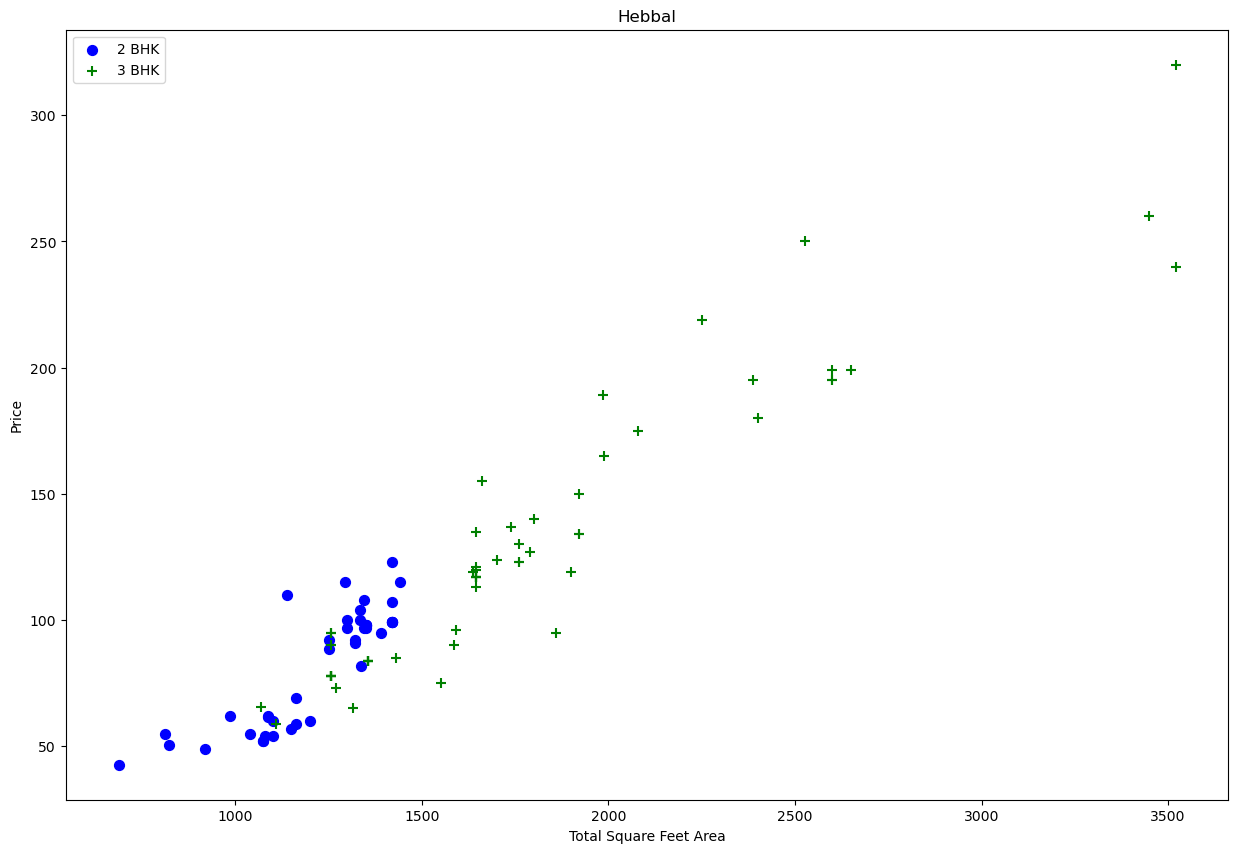

In [178]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    plt.show()

plot_scatter_chart(df7, "Hebbal")

In [179]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)
    return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7317, 7)

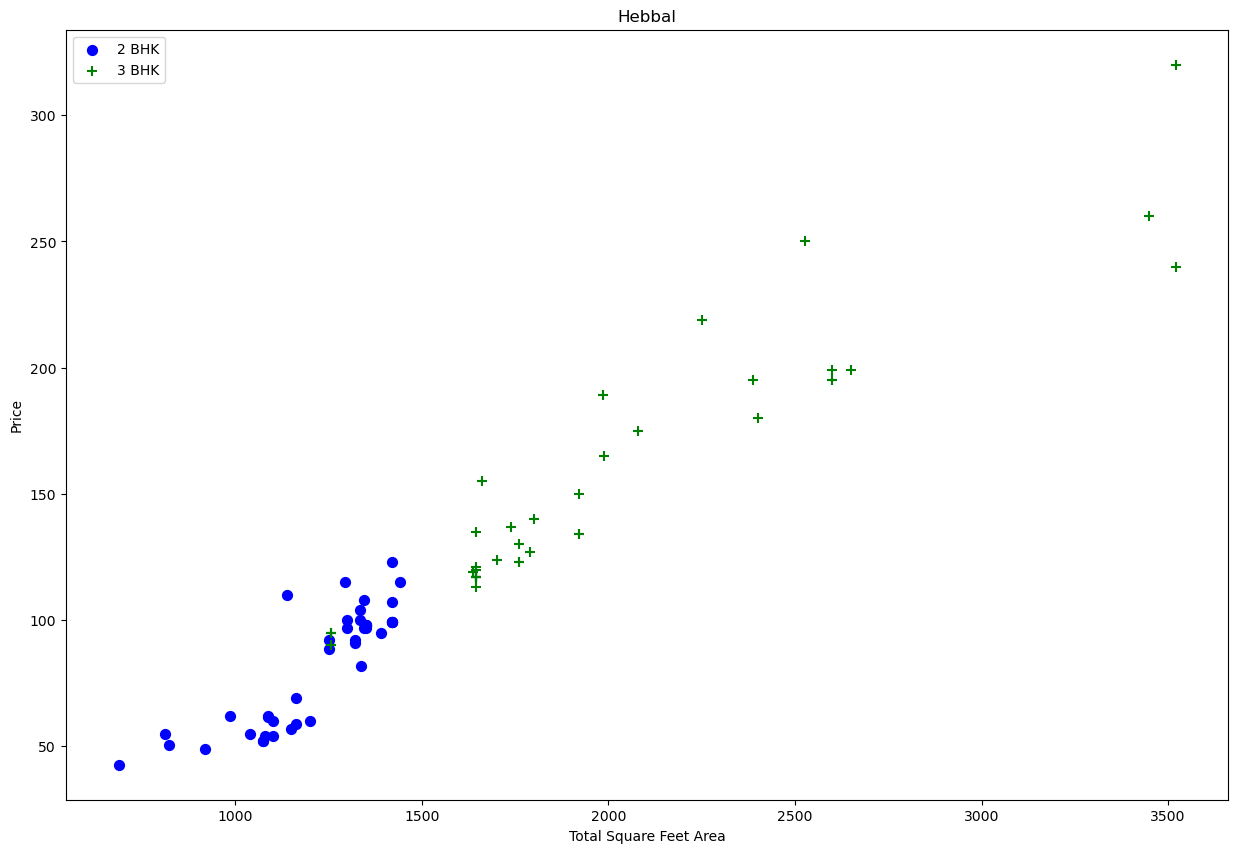

In [180]:
plot_scatter_chart(df8, "Hebbal")

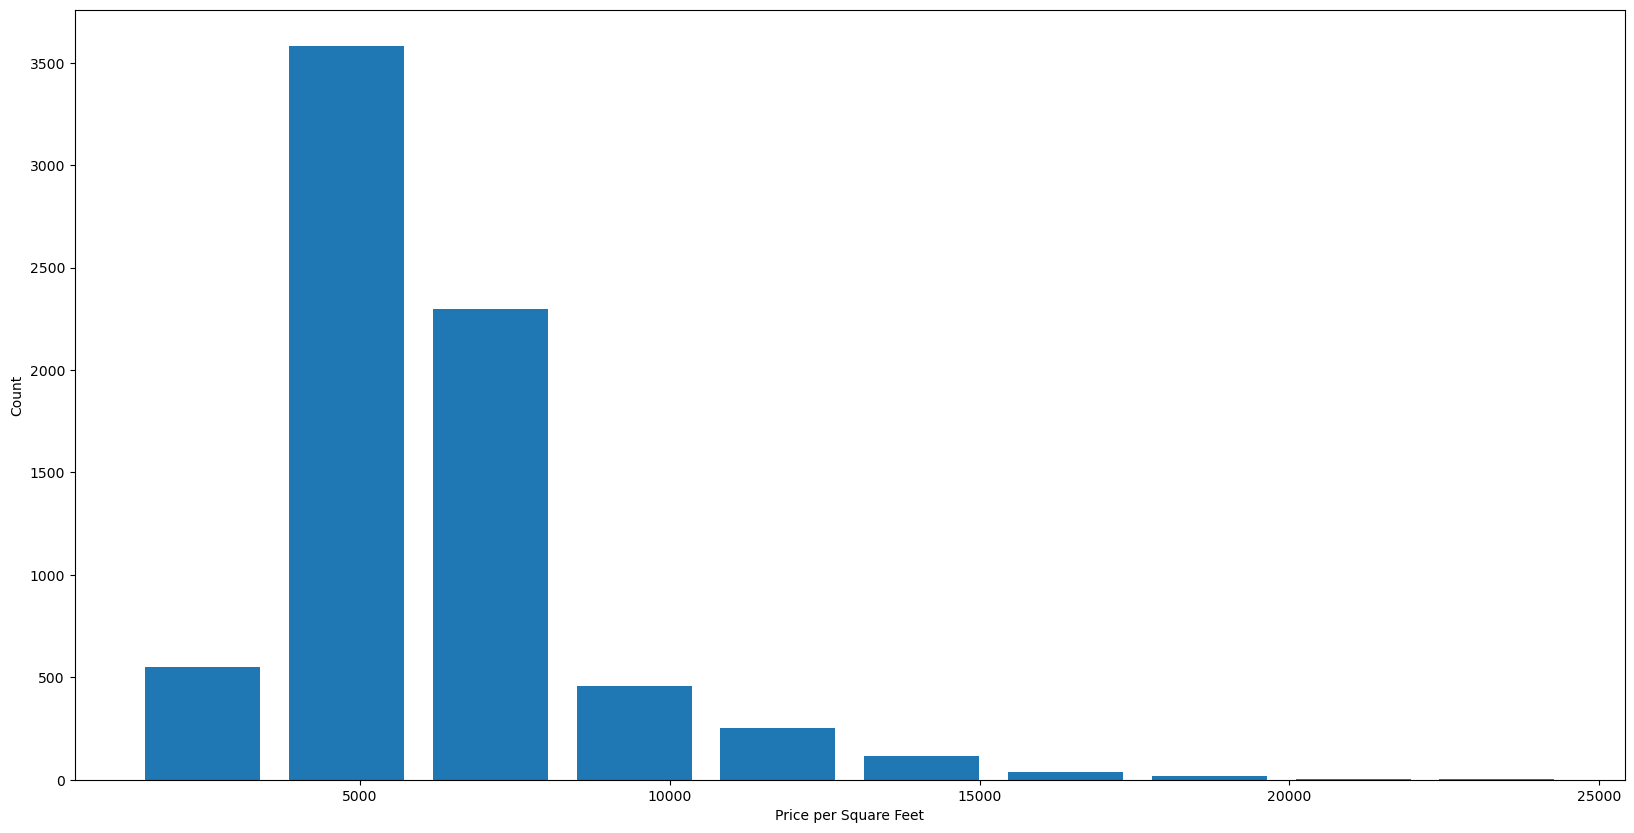

In [181]:
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price per Square Feet")
plt.ylabel("Count")
plt.show()

In [182]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [183]:
df8[df8.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


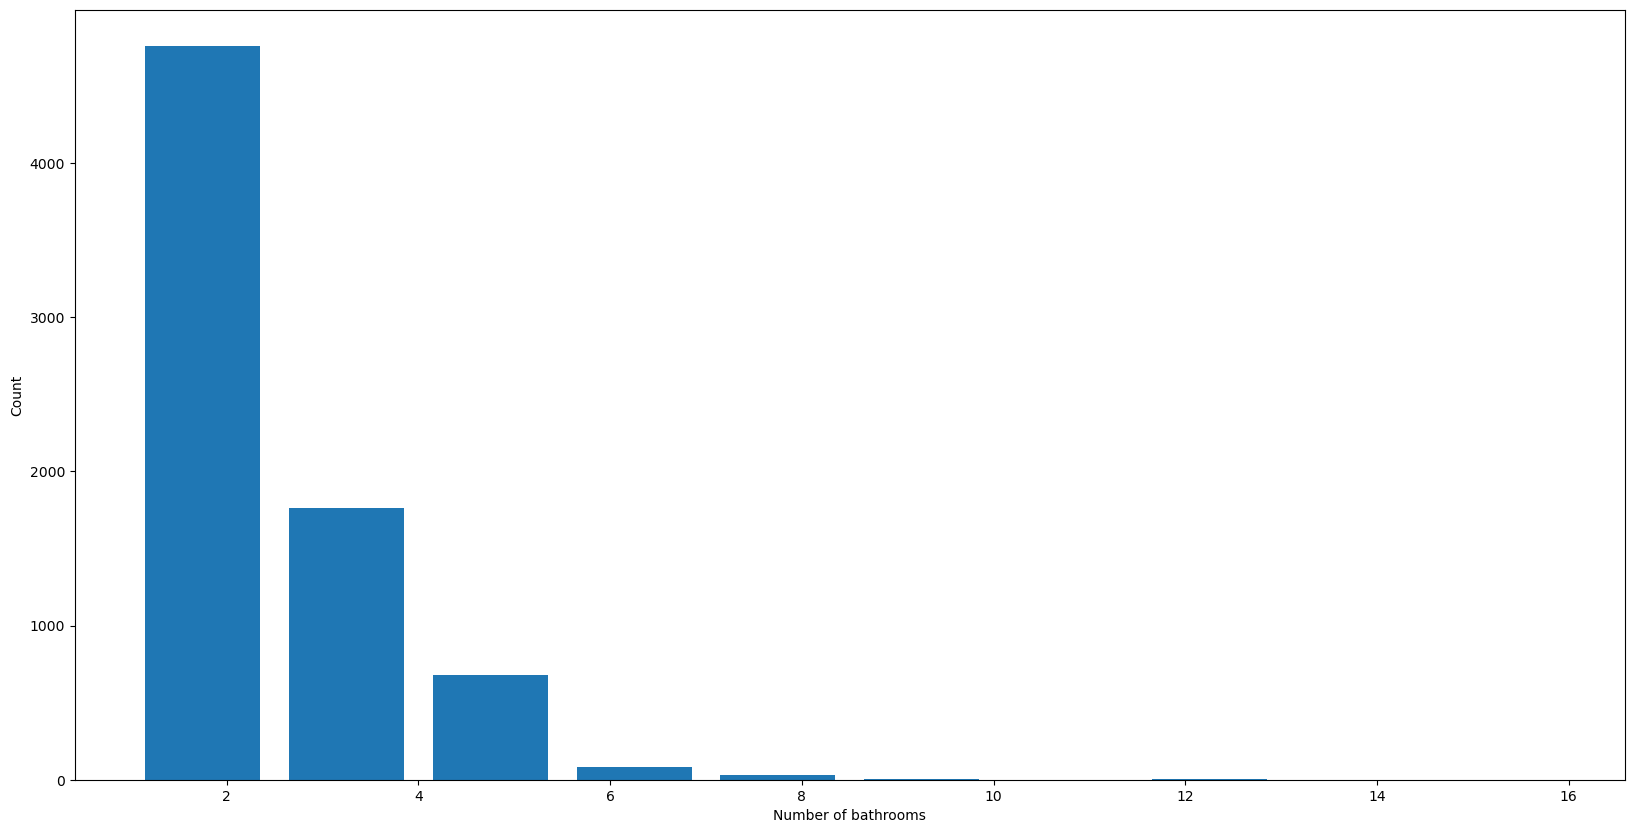

In [184]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

In [185]:
df8[df8.bath >= (df8.bhk + 2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
36,2nd Stage Nagarbhavi,6 Bedroom,3000.0,8.0,451.0,6,15033.333333
37,2nd Stage Nagarbhavi,6 Bedroom,2400.0,8.0,450.0,6,18750.000000
530,Arekere,4 BHK,2710.0,6.0,142.0,4,5239.852399
580,BTM 2nd Stage,3 Bedroom,1260.0,5.0,185.0,3,14682.539683
813,Bannerghatta,4 BHK,3012.0,6.0,250.0,4,8300.132802
...,...,...,...,...,...,...,...
9914,other,4 BHK,6652.0,6.0,510.0,4,7666.867108
10035,other,2 BHK,600.0,4.0,70.0,2,11666.666667
10090,other,3 Bedroom,5656.0,5.0,499.0,3,8822.489392
10203,other,4 BHK,6652.0,6.0,660.0,4,9921.828022


In [186]:
# It's unusual for a property to have more than (bhk + 2) number of bathrooms
# so we remove them as outliers
df9 = df8[df8.bath < (df8.bhk + 2)]
df9.shape

(7239, 7)

In [187]:
df10 = df9.drop(columns=['size', 'price_per_sqft'], axis=1)
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# Model Building

In [188]:
# location is a text column, so it can't be used in machine learning algorithms
# Need to convert into a numerical column
# We use One-Hot Encoding
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [189]:
# To avoid a dummy variable trap, we should have one less dummy variable column
# e.g. if we drop the "other" column, and every other location column is set to 0,
# then that can represent the "other" column
# Therefore we can forgo one column.
df11 = pd.concat([df10, dummies.drop('other', axis=1)], axis=1)
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [190]:
df12 = df11.drop(columns='location', axis=1)
df12.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [191]:
df12.shape

(7239, 244)

In [192]:
# Should contain only independent variables, so drop the price column
X = df12.drop(columns='price', axis=1)
X.columns = X.columns.str.lower()
X.head(3)

,total_sqft,bath,bhk,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,6th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [193]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [194]:
from sklearn.model_selection import train_test_split
# 20% of the data for testing, 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [195]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8629132245229625

In [196]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

Most of the scores are above 80%

Let's try other regression algorithms like lasso regression, decision tree regression etc.
and choose the model that gives the best score.
We'll use GridSearchCV for this.

In [197]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())
            ]),
            'params': {
                'regressor__fit_intercept': [True, False],
                'regressor__positive': [True, False]
            }
        }, 
        'lasso': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('lasso_model', Lasso())
            ]),
            'params': {
                'lasso_model__alpha': [1, 2],
                'lasso_model__selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    gs_models = {}
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        gs_models[algo_name] = gs

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params']), gs_models

results_df, trained_gs_models = find_best_model_using_gridsearchcv(X_train, y_train)

In [198]:
pd.set_option('display.max_colwidth', None)
results_df

,model,best_score,best_params
0,linear_regression,0.856053,"{'regressor__fit_intercept': True, 'regressor__positive': False}"
1,lasso,0.830964,"{'lasso_model__alpha': 1, 'lasso_model__selection': 'cyclic'}"
2,decision_tree,0.740710,"{'criterion': 'squared_error', 'splitter': 'best'}"


In [199]:
# Identify the best performing model from results_df
best_model_name = results_df.loc[results_df['best_score'].idxmax(), 'model']
print(f"\nBest model identified by GridSearchCV on training data: {best_model_name}")


Best model identified by GridSearchCV on training data: linear_regression


In [200]:
# Retrieve its corresponding GridSearchCV object
final_best_model_gs = trained_gs_models[best_model_name]

# Access the  best estimator (the trained pipeline)
final_best_estimator = final_best_model_gs.best_estimator_

# Evaluate on the test data
final_test_score = final_best_estimator.score(X_test, y_test)
print(final_test_score)

0.8629132245229445


In [201]:
print(final_best_model_gs.best_params_)

{'regressor__fit_intercept': True, 'regressor__positive': False}


In [202]:
print(final_best_estimator)
print(final_best_estimator.named_steps['regressor'].get_params())

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [203]:
def predict_price(location, sqft, bath, bhk):
    # Find the column index for the given location (e.g., '1st Phase JP Nagar')
    try:
        loc_index = X.columns.get_loc(location)
    except KeyError:
        loc_index = -1

    input_df = pd.DataFrame(0, index=[0], columns=X.columns)

    # Set the 'sqft', 'bath', and 'bhk' values
    input_df['total_sqft'] = sqft
    input_df['bath'] = bath
    input_df['bhk'] = bhk
    
    # Set the one-hot encoded location column to 1, if it's not an 'other' location
    # If loc_index is -1 (meaning it's an 'other' location), then all location dummy variables remain 0,
    # which correctly represents the 'other' category due to the dummy variable trap handling.
    if loc_index != -1:
        input_df[location] = 1 

    return final_best_estimator.predict(input_df)[0]

In [204]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

np.float64(81.41532588414329)

In [205]:
predict_price('1st phase jp nagar', 1000, 3, 3)

np.float64(86.08062284988492)

In [206]:
predict_price('indira nagar', 1000, 2, 2)

np.float64(193.31197733180858)

In [207]:
predict_price('indira nagar', 1000, 3, 3)

np.float64(195.52689759855627)

In [208]:
import pickle

with open('bangalore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(final_best_estimator, f)

In [209]:
import json 
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))